In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import os
import requests
from MCForecastTools import MCSimulation
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\nicko\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
load_dotenv()

True

In [4]:
start_date = pd.Timestamp('2015-02-04', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-13', tz='America/New_York').isoformat()

In [5]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [6]:
tickers = ['SPLV','SCHD','PHO','AOA','AAPL','ICLN',]
timeframe = "1D"
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data


In [7]:
MC_five_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1/6]*6,
    num_simulation = 500,
    num_trading_days = 252 * 5
)   

In [8]:
MC_five_year.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2015-02-04 00:00:00-05:00  118.50  120.51  118.31  119.55  63181345   
2015-02-05 00:00:00-05:00  120.02  120.23  119.25  119.94  36157432   
2015-02-06 00:00:00-05:00  120.05  120.25  118.45  118.91  38899318   
2015-02-09 00:00:00-05:00  118.55  119.84  118.43  119.72  33755237   
2015-02-10 00:00:00-05:00  120.17  122.15  120.16  122.02  52811215   

                                          AOA                             ...  \
                          daily_return   open     high      low    close  ...   
time                                                                      ...   
2015-02-04 00:00:00-05:00          NaN  46.60  46.7991  46.5100  46.5201  ...   
2015-02-05 00:00:00-05:00     0.003262  46.85  47.0000  46.5100  46.9800  ...   
2015-02-06 00:00:00-05:00    -0.008588  46.93  46.9300  46.5664  46.6100  ...   
2015-02-09 00:00:00-05:00     0.006812  46.50  46.5999  46.3401  46.4500  ...   
2015-02-10 00:00:00-05:00     0.019211  46.70  46.8000  46.4908  46.7600  ...   

                              SCHD                                 SPLV  \
                               low  close    volume daily_return   open   
time                                                                      
2015-02-04 00:00:00-05:00  39.5800  39.66  407412.0          NaN  38.44   
2015-02-05 00:00:00-05:00  39.8390  40.05  293999.0     0.009834  38.55   
2015-02-06 00:00:00-05:00  39.9000  40.00  471370.0    -0.001248  38.81   
2015-02-09 00:00:00-05:00  39.7249  39.83  314369.0    -0.004250  38.24   
2015-02-10 00:00:00-05:00  39.8790  40.22  304559.0     0.009792  38.19   

                                                                          
                              high    low  close     volume daily_return  
time                                                                      
2015-02-04 00:00:00-05:00  38.6000  38.30  38.38  1955443.0          NaN  
2015-02-05 00:00:00-05:00  38.7800  38.47  38.77  1345649.0     0.010162  
2015-02-06 00:00:00-05:00  38.8100  38.11  38.25  2149772.0    -0.013412  
2015-02-09 00:00:00-05:00  38.2500  37.92  38.03  1490770.0    -0.005752  
2015-02-10 00:00:00-05:00  38.4167  38.03  38.38   863987.0     0.009203  

[5 rows x 36 columns]

In [9]:
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988731,1.003959,0.993925,0.995647,1.003363,1.009771,1.003913,1.003398,1.011876,1.006143,...,0.998548,1.001303,0.992969,0.994686,1.003631,1.000581,1.006197,1.001492,1.005996,1.008802
2,0.992154,1.014960,0.995407,0.993407,0.991510,1.012297,1.014240,1.012348,1.022666,1.006316,...,1.000641,1.004922,0.990025,1.000333,1.007426,0.996669,1.002045,1.002263,1.008635,1.012392
3,0.987335,1.008187,0.987350,0.998754,0.988672,1.007237,1.019977,1.014461,1.031332,1.010847,...,0.996781,1.010190,0.983352,1.001753,0.999133,1.005698,0.998698,1.002341,1.017209,1.009910
4,1.003897,1.011793,0.993378,1.004616,0.983167,1.006301,1.023606,1.032650,1.037457,1.008850,...,1.015572,1.019135,0.979971,1.001666,0.996820,1.010876,1.004118,1.014717,1.008497,1.015967
5,0.989216,1.009357,0.996251,0.998193,0.995067,0.999970,1.041062,1.031607,1.035887,1.012733,...,1.012988,1.017416,0.989566,1.010492,0.989335,1.013002,0.999057,1.016012,1.024734,1.010006
6,0.989558,1.010456,0.999650,0.994392,0.996152,0.996497,1.039840,1.030477,1.040908,1.011787,...,1.015420,1.026248,0.990912,1.020224,0.990114,1.025102,1.001803,1.031919,1.017675,1.016863
7,0.983305,1.007061,0.995761,0.990300,0.997854,0.991949,1.054798,1.022308,1.037573,0.997985,...,1.000058,1.026978,1.001362,1.021549,0.997919,1.024543,1.002495,1.033097,1.021512,1.014425
8,0.989029,1.005684,0.989464,1.004189,1.000048,0.987146,1.052577,1.027501,1.036620,0.991907,...,1.000236,1.041026,1.012618,1.028502,0.993420,1.018619,1.004057,1.036773,1.020348,1.019214
9,0.999848,1.005680,0.988579,1.001015,1.009189,0.984386,1.052306,1.050852,1.028396,0.994482,...,1.001080,1.036310,1.005847,1.033977,0.997545,1.017869,1.008216,1.040271,1.034980,1.022994


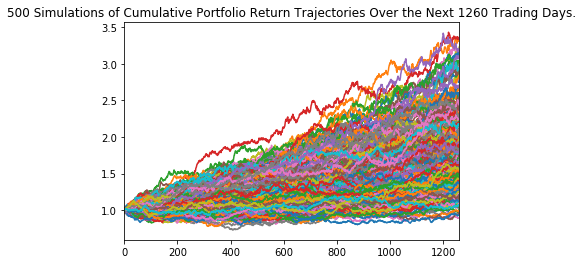

In [10]:
line_plot = MC_five_year.plot_simulation()

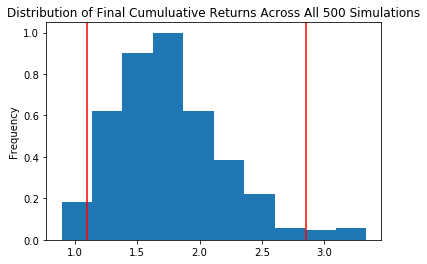

In [11]:
MC_five_year.plot_distribution()

In [12]:
portfolio_tbl = MC_five_year.summarize_cumulative_return()
print(portfolio_tbl)

count           500.000000
mean              1.759717
std               0.432789
min               0.892999
25%               1.452238
50%               1.708235
75%               1.995006
max               3.334308
95% CI Lower      1.100054
95% CI Upper      2.852726
Name: 1260, dtype: float64


In [13]:
initial_investment = 10000


ci_lower = round(portfolio_tbl[8]*initial_investment,2)
ci_upper = round(portfolio_tbl[9]*initial_investment,2)

ci_lower = ('${0:,.0f}').format(ci_lower)
ci_upper = ('${0:,.0f}').format(ci_upper)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" {ci_lower} and {ci_upper}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 5 years will end within in the range of $11,001 and $28,527
